#### 아이오와주 에임스(Ames, Iowa)의 주택 상태 등급 분류 (다중 분류)

[1] 모듈 로딩 및 데이터 준비 <hr>

In [3]:
## =========================================================
## [1-1] 모듈 로딩
## =========================================================
## 기본 모듈
import pandas as pd
import numpy as np

## 시각화 모듈
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

## ML 전처리 및 모델 모듈
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

## 평가 지표 모듈
from sklearn.metrics import classification_report

## UI 관련 모듈
import gradio
import joblib

In [4]:
## =========================================================
## [1-2] 데이터 준비
## =========================================================
DATA_FILE = '../train.csv'

houseDF = pd.read_csv(DATA_FILE)

houseDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


[2] 데이터 확인 및 전처리<hr>

In [5]:
## =========================================================
## [2-1] 데이터 확인 - 정보/기술통계/결측치/중복값
## =========================================================
print('====== [ 데이터 정보 확인 ] ======')
display(houseDF.info())

print('====== [ 데이터 기술통계 확인 ] ======')
display(houseDF.describe())

print('====== [ 데이터 결측치 확인 ] ======')
display(houseDF.isna().sum())

print('====== [ 데이터 중복값 확인 ] ======')
display(houseDF.duplicated().sum())

====== [ 데이터 정보 확인 ] ======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-

None

====== [ 데이터 기술통계 확인 ] ======


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


====== [ 데이터 결측치 확인 ] ======


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

====== [ 데이터 중복값 확인 ] ======


np.int64(0)

In [6]:
# -------------------------------------------------------------
# 이상치 분석 및 선택적 제거
# -------------------------------------------------------------
def analysis_outlier(data, remove=False, target_col=None):
    '''
    이상치 분석 및 선택적 제거 함수
    
    data       : DataFrame - 분석할 데이터
    remove     : bool - True: 제거, False: 분석만
    target_col : str - 제거할 열 이름 (remove=True일 때 필수)
    '''
    # 숫자 데이터만 가져옴(error 방지)
    num_data = data.select_dtypes(include=[np.number])
    
    print("=== 이상치 분석 ===")
    cleanDF = data.copy()  # ✓ 초기화: 제거할 데이터를 누적하기 위해 복사본 사용
    
    for col in num_data.columns:
        
        # 사분위수 (원본 데이터로부터 계산)
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1

        # 하한/상한
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        
        # ✓ 최솟값, 최댓값 추가
        min_val = data[col].min()
        max_val = data[col].max()
        
        # 이상치 (원본 데이터 기준)
        mask = (data[col] < lower) | (data[col] > upper)
        outliers = data[mask][col]
        
        upper_out = data[data[col] > upper][col]
        lower_out = data[data[col] < lower][col]
        
        # ✓ 출력: 범위 + 최솟값/최댓값 추가
        print(f"【{col}】")
        print(f"  데이터 범위: [{min_val:.2f}, {max_val:.2f}]")
        print(f"  이상치 범위: [{lower:.2f}, {upper:.2f}]")
        print(f"  이상치: {len(outliers)}개 (상한: {len(upper_out)}, 하한: {len(lower_out)})")
        # if len(outliers) > 0:
        #     print(f"  값: {sorted(outliers.values)}")

        # 제거: 해당 열에서만 이상치 제거
        if remove and col == target_col:
            before = len(cleanDF)
            cleanDF = cleanDF[(cleanDF[col] >= lower) & (cleanDF[col] <= upper)]
            after = len(cleanDF)
            print(f"  ✓ 제거됨: {before}행 → {after}행")

        print()

    return cleanDF if remove else None

print(analysis_outlier(houseDF))

=== 이상치 분석 ===
【Id】
  데이터 범위: [1.00, 1460.00]
  이상치 범위: [-728.50, 2189.50]
  이상치: 0개 (상한: 0, 하한: 0)

【MSSubClass】
  데이터 범위: [20.00, 190.00]
  이상치 범위: [-55.00, 145.00]
  이상치: 103개 (상한: 103, 하한: 0)

【LotFrontage】
  데이터 범위: [21.00, 313.00]
  이상치 범위: [27.50, 111.50]
  이상치: 88개 (상한: 46, 하한: 42)

【LotArea】
  데이터 범위: [1300.00, 215245.00]
  이상치 범위: [1481.50, 17673.50]
  이상치: 69개 (상한: 67, 하한: 2)

【OverallQual】
  데이터 범위: [1.00, 10.00]
  이상치 범위: [2.00, 10.00]
  이상치: 2개 (상한: 0, 하한: 2)

【OverallCond】
  데이터 범위: [1.00, 9.00]
  이상치 범위: [3.50, 7.50]
  이상치: 125개 (상한: 94, 하한: 31)

【YearBuilt】
  데이터 범위: [1872.00, 2010.00]
  이상치 범위: [1885.00, 2069.00]
  이상치: 7개 (상한: 0, 하한: 7)

【YearRemodAdd】
  데이터 범위: [1950.00, 2010.00]
  이상치 범위: [1911.50, 2059.50]
  이상치: 0개 (상한: 0, 하한: 0)

【MasVnrArea】
  데이터 범위: [0.00, 1600.00]
  이상치 범위: [-249.00, 415.00]
  이상치: 96개 (상한: 96, 하한: 0)

【BsmtFinSF1】
  데이터 범위: [0.00, 5644.00]
  이상치 범위: [-1068.38, 1780.62]
  이상치: 7개 (상한: 7, 하한: 0)

【BsmtFinSF2】
  데이터 범위: [0.00, 1474.00]
  이상치 범

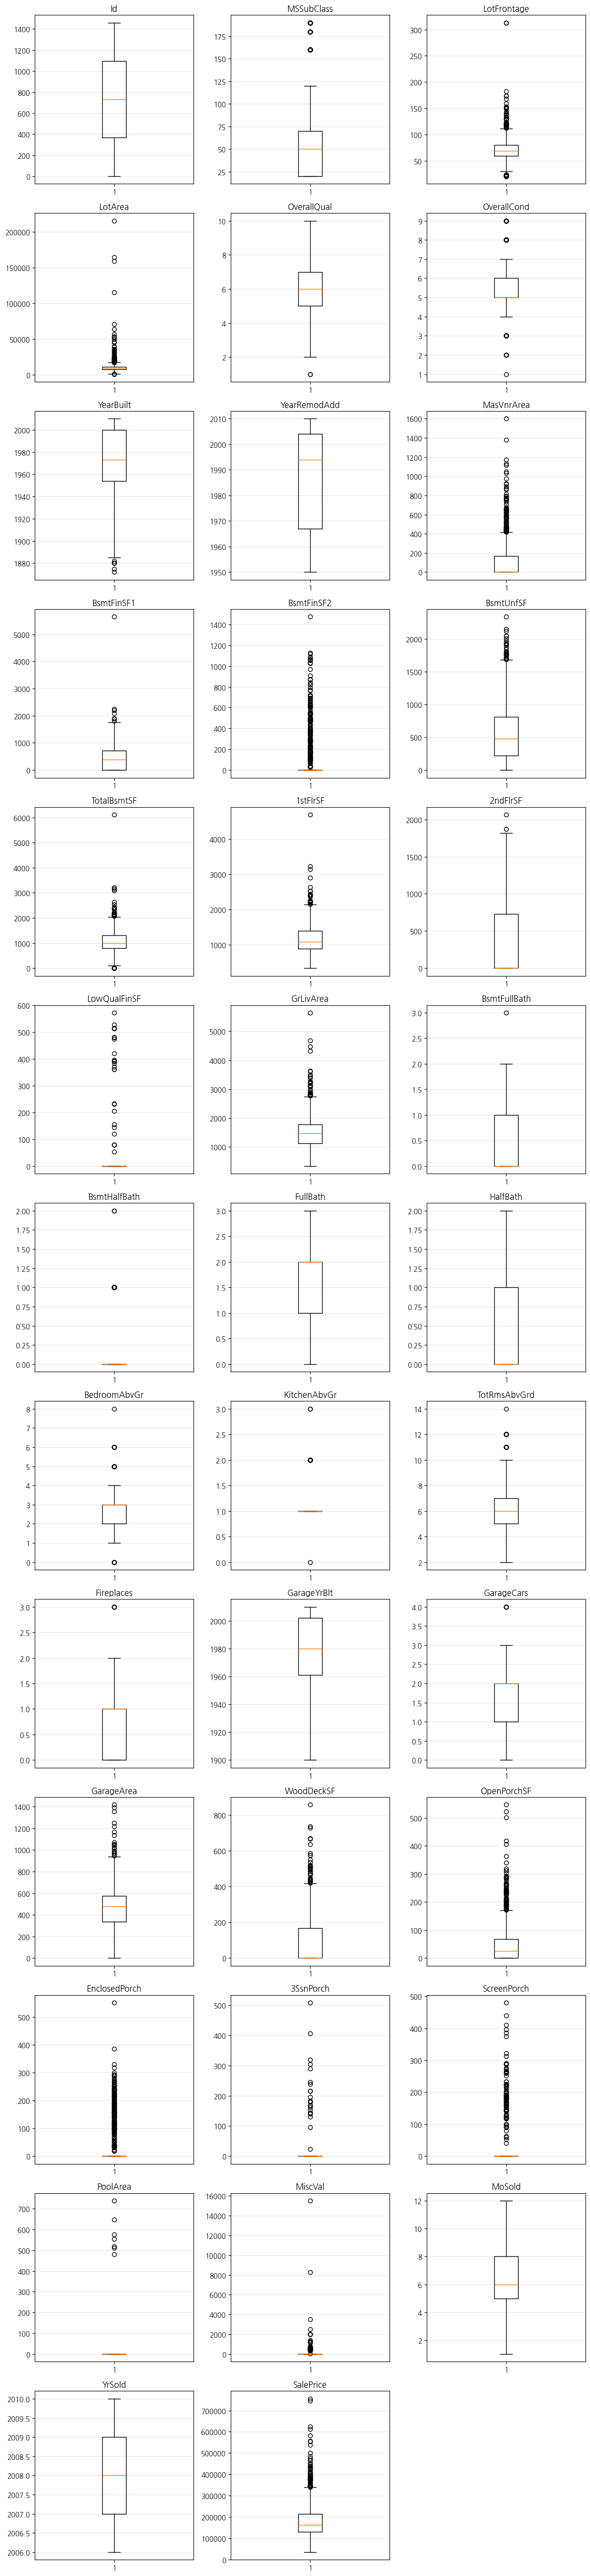

In [7]:
## ---------------------------------------------------------------------
## 함수기능 : 수치형 컬럼별 이상치 확인(Box-Plot, Subplot)
## 함수이름 : boxplot_outlier_check_subplot
## 매개변수 : df
## 반환결과 : 없음
## ---------------------------------------------------------------------
def boxplot_outlier_check_subplot(df):

    # 수치형 컬럼 선택
    num_cols = df.select_dtypes(include='number').columns
    n_cols = len(num_cols)

    # 서브플롯 배치 (2열 기준)
    cols = 3
    rows = (n_cols + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    axes = axes.flatten()

    for idx, col in enumerate(num_cols):
        axes[idx].boxplot(df[col].dropna())
        axes[idx].set_title(col)
        axes[idx].grid(axis='y', alpha=0.3)

    # 남는 subplot 제거
    for i in range(idx + 1, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

boxplot_outlier_check_subplot(houseDF)

[3] 데이터 학습 준비 <hr>

In [8]:
# ============================================================
# [3-1] 주택 연식 & 리모델링 여부 파생 변수 생성
# ============================================================
CURRENT_YEAR = 2000  # 데이터 기준 연도

houseDF['HouseAge'] = CURRENT_YEAR - houseDF['YearBuilt']
houseDF['Remodeled'] = (houseDF['YearRemodAdd'] != houseDF['YearBuilt']).astype(int)

In [9]:
# ============================================================
# [3-2] 타겟(Target) 생성 - 주택 상태 등급
# ============================================================
def house_condition_label(row):
    if (row['HouseAge'] <= 15) and (row['OverallCond'] >= 7):
        return 'Good'
    elif (row['HouseAge'] >= 50) and (row['OverallCond'] <= 4):
        return 'Poor'
    else:
        return 'Normal'

houseDF['ConditionLabel'] = houseDF.apply(house_condition_label, axis=1)

houseDF['ConditionLabel'].value_counts()

ConditionLabel
Normal    1404
Poor        46
Good        10
Name: count, dtype: int64

In [10]:
# ============================================================
# [3-3] 피쳐/타겟 분리
# ============================================================
featureDF = houseDF[['HouseAge', 'Remodeled', 'OverallCond']]
targetSR  = houseDF['ConditionLabel']

print(f'featureDF : {featureDF.shape}, {featureDF.ndim}D')
print(f'targetSR  : {targetSR.shape} ,  {targetSR.ndim}D')

featureDF : (1460, 3), 2D
targetSR  : (1460,) ,  1D


In [11]:
## ==================================================
## [3-4] 학습용/테스트용 분리
## ==================================================
x_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=targetSR
                                                    )

In [12]:
## ==================================================
## [3-5] 타겟 컬럼 인코딩 처리 
## ==================================================
lbEncoder  = LabelEncoder()
en_y_train = lbEncoder.fit_transform(y_train) ## 학습용 타겟으로 인코더 생성 후 변환까지 진행
en_y_test  = lbEncoder.transform(y_test)

[4] Random Forest 모델 학습 <hr>

In [13]:
## ==================================================
## [4-1] 랜덤포레스트 파이프라인 생성 
## ==================================================
## 컬럼 구분 (수치형이랑 범주형이랑)
numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = x_train.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=42))
])

In [14]:
## ==================================================
## [4-2] GridSearchCV 하이퍼파라미터 설정 
## ==================================================
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2],
    'rf__max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro'
)

In [15]:
## ==================================================
## [4-3] 모델 학습 
## ==================================================
grid_search.fit(x_train, y_train)

print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 CV F1 score:", grid_search.best_score_)

# 최적 하이퍼파라미터: {'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
# 최고 CV F1 score: 0.9552599162355261

최적 하이퍼파라미터: {'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
최고 CV F1 score: 0.9552599162355261


c:\Users\KDT11\anaconda3\envs\ML\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\KDT11\anaconda3\envs\ML\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\KDT11\anaconda3\envs\ML\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\KDT11\anaconda3\envs\ML\Lib\site-packages\sklearn\pipeline.py", line 663, i

In [16]:
## ==================================================
## [4-4] 테스트 데이터 평가
## ==================================================
best_model_rf = grid_search.best_estimator_
y_pred = best_model_rf.predict(x_test)

y_test_labels = lbEncoder.inverse_transform(en_y_test)

# 리포트 출력
print(classification_report(y_test_labels, y_pred))

# 테스트 데이터가 극도로 불균형하거나 매우 적은 샘플일 경우, F1=1.0은 “진짜 성능”이라기보다 샘플 편향/과적합
# ==> 데이터 샘플 수 확보 혹은 cross-validation 기반 평균 F1

skf = StratifiedKFold(n_splits=5, 
                      shuffle=True, 
                      random_state=42
                      )

rf_cv_f1_scores = cross_val_score(best_model_rf, 
                               x_train, 
                               y_train, 
                               cv=skf, 
                               scoring='f1_macro'
                               )

print("Random Forest Cross validation F1 macro 평균:", rf_cv_f1_scores.mean())

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00         2
      Normal       1.00      1.00      1.00       281
        Poor       1.00      1.00      1.00         9

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292

Random Forest Cross validation F1 macro 평균: 0.932889874353289


[5] Dicision Tree 모델 학습 <hr>

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier(random_state=42))
])

In [18]:
param_grid = {
    'dt__max_depth': [None, 5, 10],
    'dt__min_samples_split': [2, 5],
    'dt__min_samples_leaf': [1, 2],
    'dt__max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2
)

In [19]:
grid_search.fit(x_train, y_train)
best_dt_model = grid_search.best_estimator_

print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 CV F1 score:", grid_search.best_score_)

# 최적 하이퍼파라미터: {'dt__max_depth': None, 'dt__max_features': 'sqrt', 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}
# 최고 CV F1 score: 0.9214824552204337

Fitting 5 folds for each of 24 candidates, totalling 120 fits
최적 하이퍼파라미터: {'dt__max_depth': None, 'dt__max_features': 'sqrt', 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}
최고 CV F1 score: 0.9214824552204337


c:\Users\KDT11\anaconda3\envs\ML\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\KDT11\anaconda3\envs\ML\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\KDT11\anaconda3\envs\ML\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\KDT11\anaconda3\envs\ML\Lib\site-packages\sklearn\pipeline.py", line 663, in 

In [20]:
y_pred = best_dt_model.predict(x_test)

print(classification_report(y_test_labels, y_pred))

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt_cv_f1_scores = cross_val_score(best_dt_model, x_train, y_train, cv=skf, scoring='f1_macro', n_jobs=-1)
print("Dicision Tree Cross validation F1 macro 평균:", dt_cv_f1_scores.mean())

              precision    recall  f1-score   support

        Good       1.00      0.50      0.67         2
      Normal       0.99      1.00      1.00       281
        Poor       1.00      0.89      0.94         9

    accuracy                           0.99       292
   macro avg       1.00      0.80      0.87       292
weighted avg       0.99      0.99      0.99       292

Dicision Tree Cross validation F1 macro 평균: 0.9105198324710522


[6] 모델 예측 <hr>

In [21]:
## 모델 성능 비교
print("Random Forest Cross validation F1 macro 평균:", rf_cv_f1_scores.mean())
print("Dicision Tree Cross validation F1 macro 평균:", dt_cv_f1_scores.mean())

## => Random Forest 모델이 더 성능이 좋음 !

Random Forest Cross validation F1 macro 평균: 0.932889874353289
Dicision Tree Cross validation F1 macro 평균: 0.9105198324710522


In [22]:
# 새로운 데이터 예시
new_data = pd.DataFrame([
    {'YearBuilt': 2010, 'YearRemodAdd': 2010, 'OverallCond': 8},
    {'YearBuilt': 1940, 'YearRemodAdd': 1980, 'OverallCond': 3},
    {'YearBuilt': 1985, 'YearRemodAdd': 1985, 'OverallCond': 5}
])

# 파생 변수 생성
CURRENT_YEAR = 2000
new_data['HouseAge'] = CURRENT_YEAR - new_data['YearBuilt']
new_data['Remodeled'] = (new_data['YearRemodAdd'] != new_data['YearBuilt']).astype(int)

# x_train 컬럼 순서 맞추기
new_data = new_data[x_train.columns]

# 예측
pred_encoded = best_model_rf.predict(new_data)
pred_proba = best_model_rf.predict_proba(new_data)

# 결과 출력
new_data['PredictedLabel'] = pred_encoded
for i, class_name in enumerate(lbEncoder.classes_):
    new_data[f'Prob_{class_name}'] = pred_proba[:, i]

print(new_data)

   HouseAge  Remodeled  OverallCond PredictedLabel  Prob_Good  Prob_Normal  \
0       -10          0            8           Good      0.695        0.305   
1        60          1            3           Poor      0.000        0.015   
2        15          0            5         Normal      0.000        1.000   

   Prob_Poor  
0      0.000  
1      0.985  
2      0.000  


In [23]:
import joblib

joblib.dump((best_model_rf, lbEncoder), "best_model_rf.pkl")

['best_model_rf.pkl']